**Understanding the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Import necessary libraries
import pandas as pd
import io

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['CHL5230-F23-Datathon#1-Dataset2.csv']))

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [ ]:
# Look for missing data
print(df.isna().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


In [ ]:
# Display the data types of each column
df.dtypes

Age                  int64
Gender               int64
Air Pollution        int64
Alcohol Usage        int64
Genetic Risk         int64
Lung Disease         int64
Obesity              int64
Smoking              int64
Passive Smoker       int64
Chest Pain           int64
Coughing of Blood    int64
Severity             int64
dtype: object

**Visualizing the Distribution of the Data**

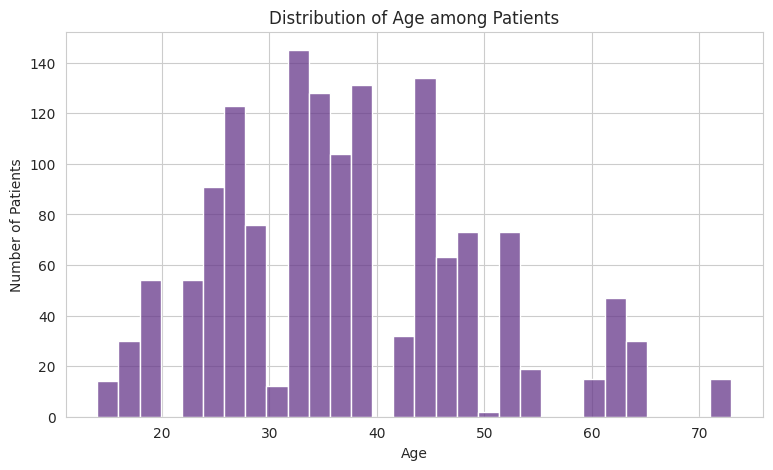

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Histogram of 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df['Age'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Age among Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()


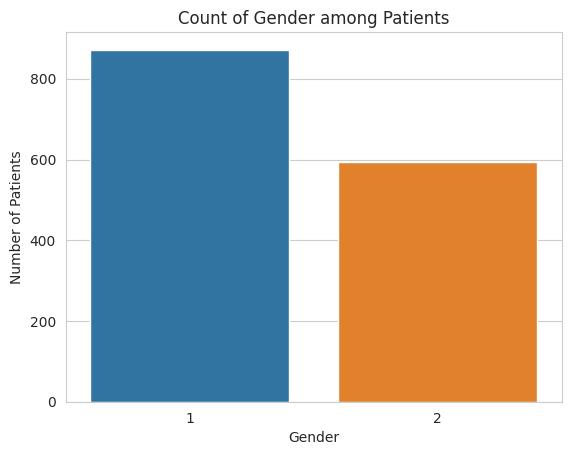

In [ ]:
# Create a count plot for the 'Gender' feature
sns.countplot(x = 'Gender', data = df)
plt.title('Count of Gender among Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

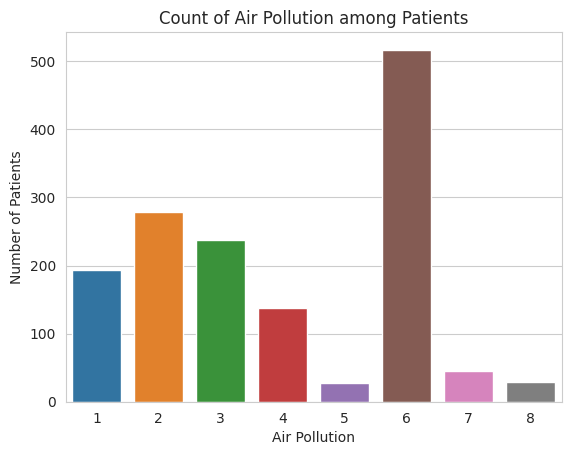

In [ ]:
# Create a count plot for the 'Air Pollution' feature
sns.countplot(x = 'Air Pollution', data = df)
plt.title('Count of Air Pollution among Patients')
plt.xlabel('Air Pollution')
plt.ylabel('Number of Patients')
plt.show()

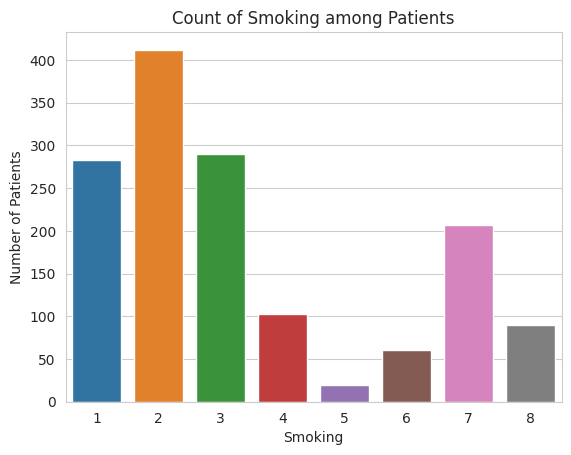

In [ ]:
# Create a count plot for the 'Smoking' feature
sns.countplot(x = 'Smoking', data = df)
plt.title('Count of Smoking among Patients')
plt.xlabel('Smoking')
plt.ylabel('Number of Patients')
plt.show()

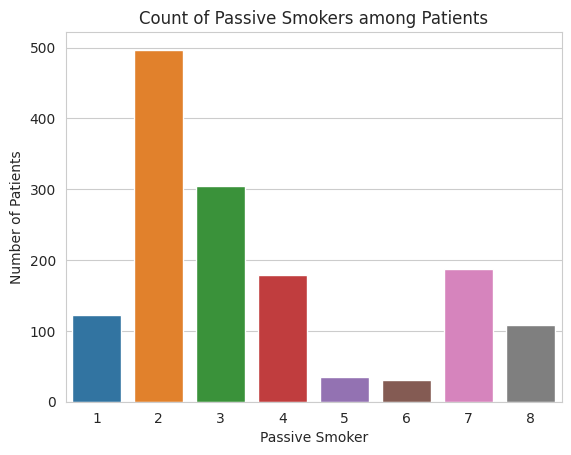

In [ ]:
# Create a count plot for the 'Passive Smoker' feature
sns.countplot(x = 'Passive Smoker', data = df)
plt.title('Count of Passive Smokers among Patients')
plt.xlabel('Passive Smoker')
plt.ylabel('Number of Patients')
plt.show()

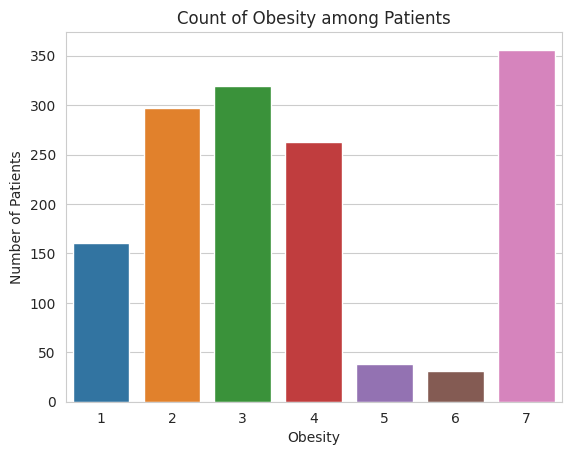

In [ ]:
# Create a count plot for the 'Obesity' feature
sns.countplot(x = 'Obesity', data = df)
plt.title('Count of Obesity among Patients')
plt.xlabel('Obesity')
plt.ylabel('Number of Patients')
plt.show()

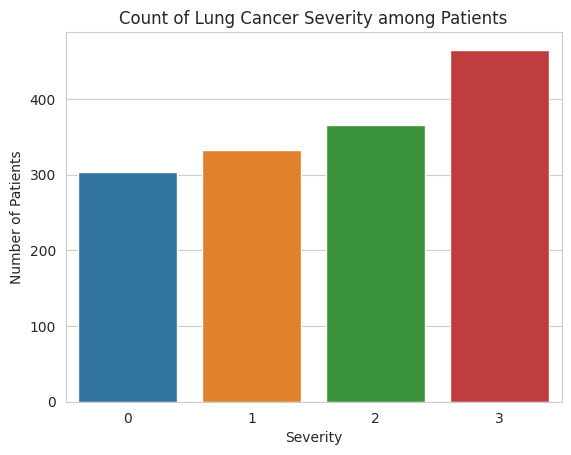

In [ ]:
# Create a count plot for the 'Severity' feature
sns.countplot(x = 'Severity', data = df)
plt.title('Count of Lung Cancer Severity among Patients')
plt.xlabel('Severity')
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
# Import necessary libraries
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='Gender', y='Age', title='Box Plot of Age Grouped by Gender', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show(renderer="colab")

**Applying the K-Nearest Neighbors (K-NN) Algorithm**

In [ ]:
#Pre-processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into labels and features
X = df[['Age', 'Gender', 'Air Pollution', 'Smoking', 'Passive Smoker', 'Obesity']]
y = df['Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Evaluating the K-NN Model**

In [ ]:
# Initialize the K-NN classifier and fit the model, setting K to 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  1  0  2]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 7 11  0 80]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        57
           1       0.83      1.00      0.91        58
           2       1.00      1.00      1.00        80
           3       0.98      0.82      0.89        98

    accuracy                           0.93       293
   macro avg       0.92      0.94      0.93       293
weighted avg       0.94      0.93      0.93       293



**Selecting the Optimal K in K-NN**

Text(0.5, 0, 'k')

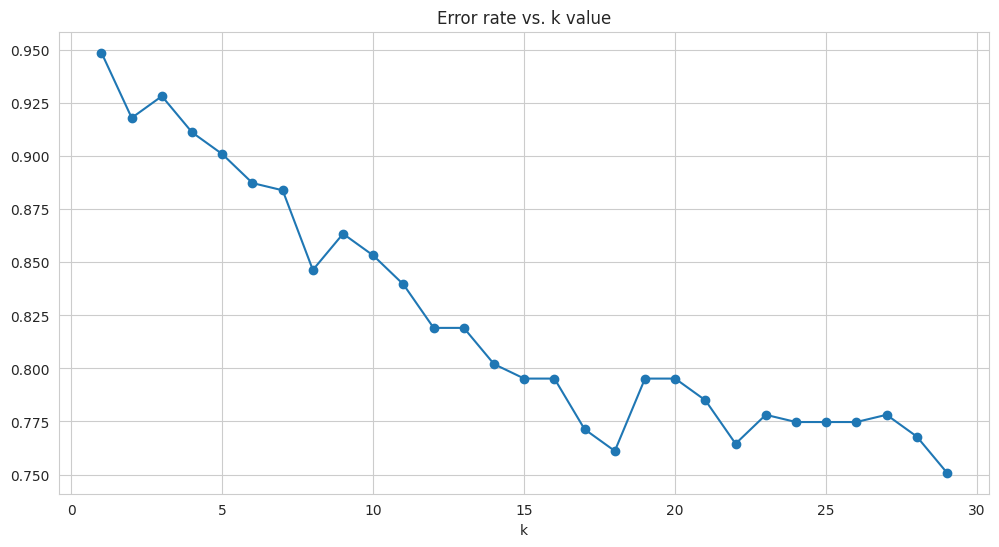

In [ ]:
# Import libraries necessary
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# Apply elbow method
k_values=range(1, 30)
errors=[]

for k in k_values:

  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  error=accuracy_score(y_test,y_pred)
  errors.append(error)

# Plot the elbow method
plt.figure(figsize=(12,6))
plt.plot(k_values,errors,marker="o")
plt.title("Error rate vs. k value")
plt.xlabel("k")

#To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after
#which the plot starts decreasing in a linear fashion.
#Thus for the given data, we conclude that the optimal number of clusters for the data is 3.
#K=3 not overfitting

**Visualizing the K-NN Results**

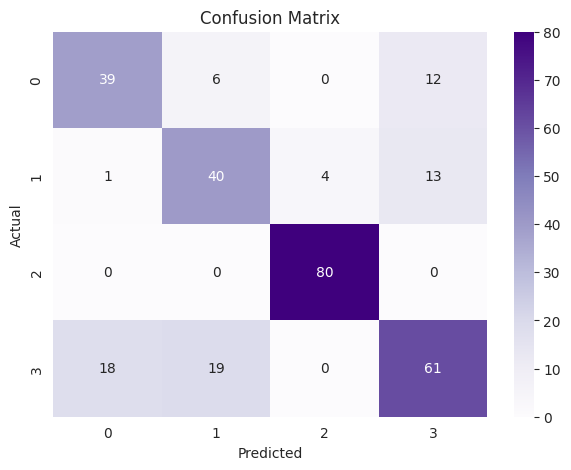

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
# Actual vs. predict
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()